# Training Support Vector Machine (SVM)

## how to learn  a <u>linear SVM </u> with sklearn

At first we start with a simiple linear svm

Preparing a dummy dataset using sklearn.datasets.make_classification

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import make_classification

# Create a dummy dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, weights=[.5, .5], random_state=1)

X.shape, y.shape

((100, 2), (100,))

Changing labels from 1 0 to 1 -1 which is suitable for prediction (just suppose each data point other side of the line)

In [7]:
y
np.where(y, 1,-1)

array([ 1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,
       -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,
       -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
       -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1])

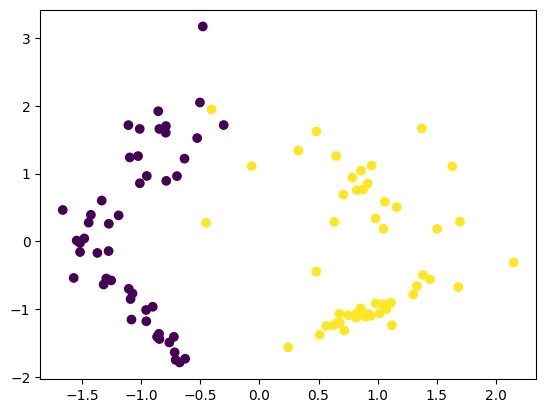

In [8]:
plt.scatter(X[:, 0], X[:, 1],c=y)

now we fit our linear classifier with sklearn

In [9]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np


clf = SVC(kernel='linear')
clf.fit(X, y)


SVC(kernel='linear')

In [10]:
clf.support_vectors_

array([[-0.52568843,  1.52568161],
       [-0.47819102,  3.17462483],
       [-0.502186  ,  2.05132133],
       [-0.67325919, -1.78962393],
       [-0.62679113, -1.73440213],
       [-0.30121926,  1.71834622],
       [-0.06539297,  1.11257376],
       [-0.45001335,  0.27345841],
       [ 0.24305711, -1.56629795],
       [-0.40394191,  1.94981005],
       [ 0.32953519,  1.34104147]])

In [11]:
clf.n_support_


array([6, 5], dtype=int32)

We can plot the seperator line only with these weights and bias

In [12]:
print('weights : ',clf.coef_[0] , 'bias : ',clf.intercept_[0])

weights :  [ 2.20441072 -0.08649644] bias :  0.3289300383201703


lets see how model can predict!

In [13]:
new_point = np.array([5, 5]).reshape(1, -1)

prediction = clf.predict(new_point)

print("Predicted class label for the new data point:", prediction)

Predicted class label for the new data point: [1]


Plotting decision boundry with meshgrid-contour and two marigins  

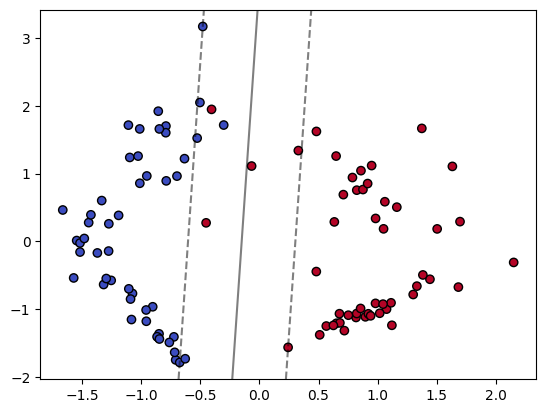

In [14]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np


clf = SVC(kernel='linear')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.show()




In this section you will learn about how to Find support vectors

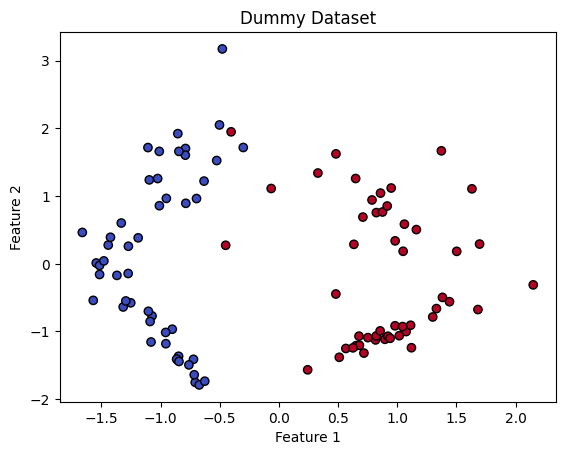

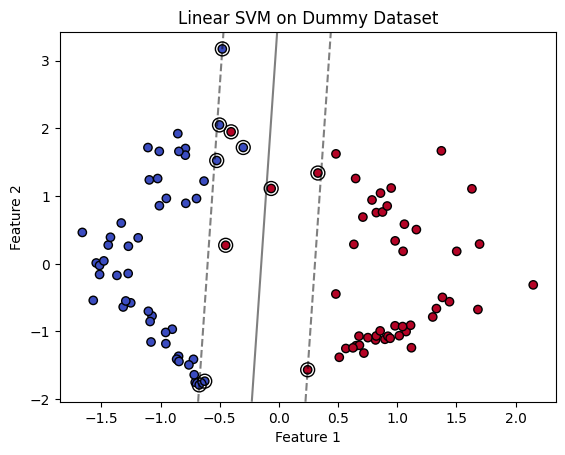

In [15]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Create a dummy dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, weights=[.5, .5], random_state=1)

# Convert labels to -1 and 1
y = np.where(y, 1, -1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dummy Dataset')
plt.show()

clf = SVC(kernel='linear')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Creating grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM on Dummy Dataset')
plt.show()


## How to learn  a <u>kernel SVM </u> with sklearn

Here we will see the limitation of linaer svm and how can we use kernel svm to inhance the prediction results



Here we use polynomial kernel

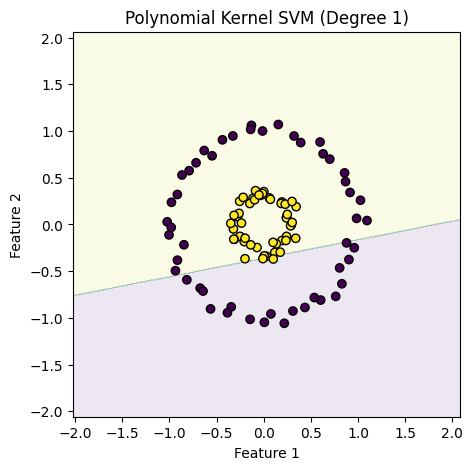

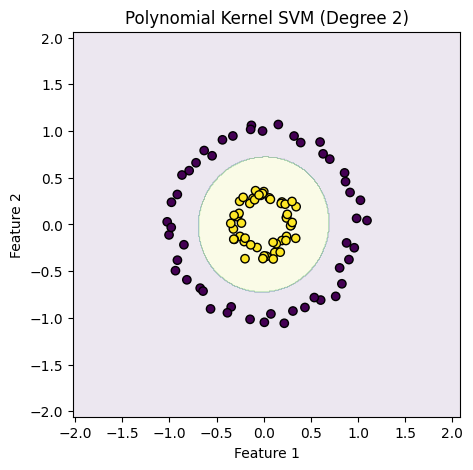

In [16]:
from sklearn.datasets import make_circles
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# making a dummy dataset
X, y = make_circles(n_samples=100, factor=.3, noise=0.05, random_state=5)

svm_poly1 = SVC(kernel='linear')
svm_poly1.fit(X, y)

svm_poly2 = SVC(kernel='poly', degree=2, C=1.0)
svm_poly2.fit(X, y)


def plot_decision_boundary(svm_model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5, 5))
    plt.contourf(xx, yy, Z, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plot_decision_boundary(svm_poly1, X, y, 'Polynomial Kernel SVM (Degree 1)')
plot_decision_boundary(svm_poly2, X, y, 'Polynomial Kernel SVM (Degree 2)')

plt.show()


Increasing polynomial kernel degree can be sometimes effective

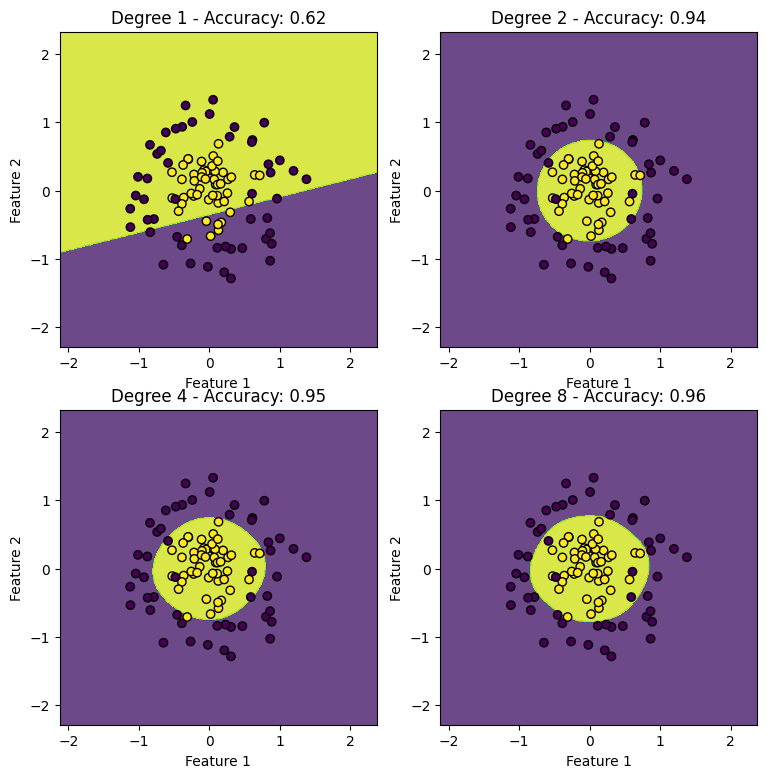

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles

def plot_decision_boundaries_subplots(X, y):
    degrees = [1, 2, 4, 8]
    models = [SVC(kernel='poly', degree=degree, C=1.0) for degree in degrees]

    fig, axes = plt.subplots(2, 2, figsize=(9, 9))
    axes = axes.flatten()

    for ax, model, degree in zip(axes, models, degrees):
        model.fit(X, y)
        y_pred = model.predict(X)
        accuracy = accuracy_score(y, y_pred)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.8)
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
        ax.set_title(f'Degree {degree} - Accuracy: {accuracy:.2f}')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')

    plt.show()

# Generate synthetic data
X, y = make_circles(n_samples=100, factor=.3, noise=0.2, random_state=5)
plot_decision_boundaries_subplots(X, y)


### Lets see other SVM kernels

These kernels are crucial for transforming the input data space into a higher-dimensional space where the data points can be linearly separable.

Now we construct another distribution of dummy dataset

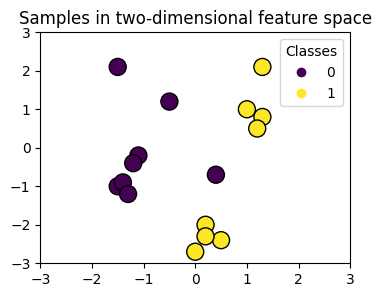

In [20]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array(
    [
        [0.4, -0.7],
        [-1.5, -1.0],
        [-1.4, -0.9],
        [-1.3, -1.2],
        [-1.1, -0.2],
        [-1.2, -0.4],
        [-0.5, 1.2],
        [-1.5, 2.1],
        [1.0, 1.0],
        [1.3, 0.8],
        [1.2, 0.5],
        [0.2, -2.0],
        [0.5, -2.4],
        [0.2, -2.3],
        [0.0, -2.7],
        [1.3, 2.1],
    ]
)

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

fig, ax = plt.subplots(figsize=(4, 3))
x_min, x_max, y_min, y_max = -3, 3, -3, 3
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()

Training SVC ...


#### 1. Linear Kernel
The linear kernel is the simplest SVM kernel and is given by the dot product of two vectors. It is suitable for linearly separable data.
$$ K(x, x') = x \cdot x' $$

In [21]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(kernel):
    # Training our SVC
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)

    _, ax = plt.subplots(figsize=(4, 3))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="k",
    )
    ax.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

    _ = plt.show()

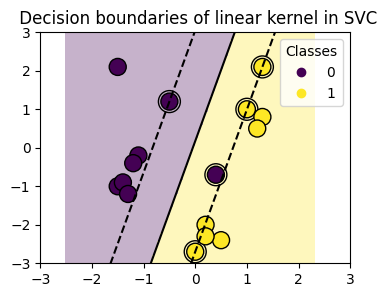

In [ ]:
plot_training_data_with_decision_boundary("linear")


#### 2. Polynomial Kernel
The polynomial kernel allows learning non-linear models by controlling the polynomial degree.
$$ K(x, x') = (\gamma \cdot x \cdot x' + r)^d $$
Where:
-  gamma  (scale) controls the curvature of the decision boundary.
-  r  (coef0) is the independent term.
-  d  is the degree of the polynomial.


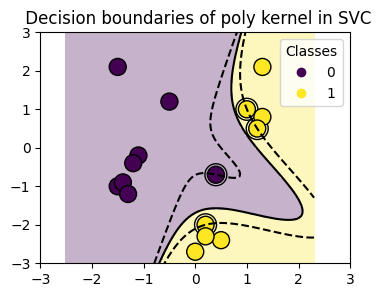

In [22]:
plot_training_data_with_decision_boundary("poly")

#### 3. Sigmoid Kernel
The sigmoid kernel, similar to the sigmoid function used in neural networks, can be used to model neural networks.
$$ K(x, x') = \tanh(\gamma \cdot x \cdot x' + r) $$
Where \( \gamma \) and \( r \) have similar roles as in the polynomial kernel.

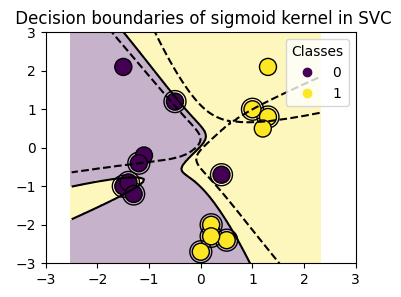

In [23]:
plot_training_data_with_decision_boundary("sigmoid")

#### 4. RBF (Radial Basis Function) Kernel
Also known as the Gaussian kernel, RBF is a popular kernel function commonly used in SVM classification. It can map an input space in infinite-dimensional space.
$$ K(x, x') = e^{-\gamma \|x - x'\|^2} $$
Where:
- \( \gamma \) (scale) defines how much influence a single training example has. The larger \( \gamma \) is, the closer other examples must be to be affected.

Each kernel has specific characteristics and applications. Choosing the right kernel depends on the data and the specific requirements of the application.

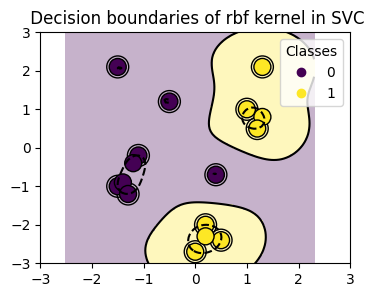

In [24]:
plot_training_data_with_decision_boundary("rbf")

## Multiclass classification with sklearn


This illustrative example also shows that complexity doesn't always help, and we need to adjust the hyperparameters according to the data distribution with trying .

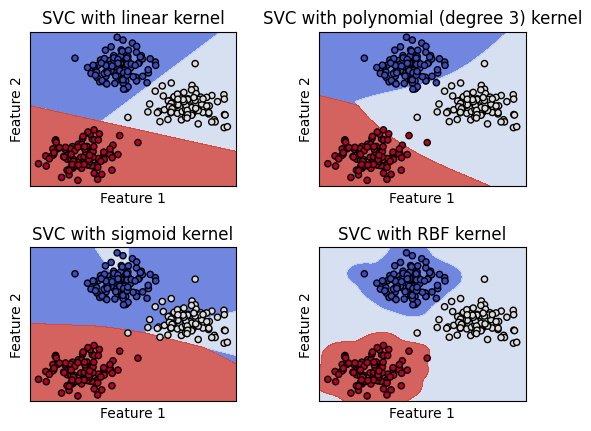

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X, y = datasets.make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifiers = [
    SVC(kernel='linear', C=0.5),
    SVC(kernel='poly', degree=3, C=0.5),
    SVC(kernel='sigmoid', C=0.5, gamma='auto'),
    SVC(kernel='rbf', gamma='auto', C=0.5)
]

# Titles for the plots
titles = ['SVC with linear kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with sigmoid kernel',
          'SVC with RBF kernel']

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(classifiers, titles, sub.flatten()):
    clf.fit(X_train, y_train)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


## Lets go further , How can we implement something like sklearn by ourselvs?

That's for the linear case. As a practice, you can modify it for different kernels :)


In [25]:
import numpy as np


class SVM:

    def __init__(self, C = 1.0):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0

    # Hinge Loss Function / Calculation
    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculating loss
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # The number of features in X
        number_of_features = X.shape[1]

        # The number of Samples in X
        number_of_samples = X.shape[0]

        c = self.C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Appending all losses
            losses.append(l)

            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb

        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):

        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)

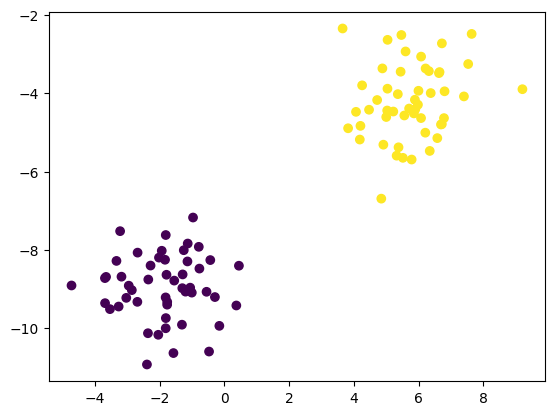

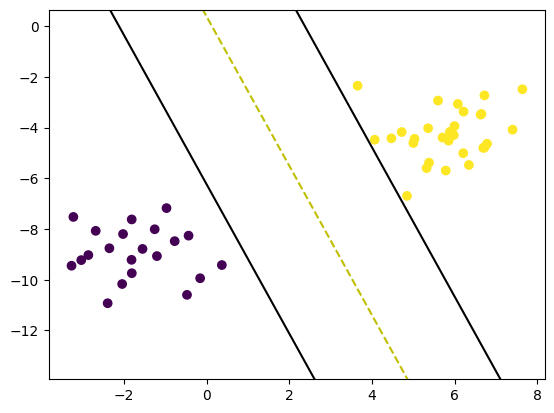

In [26]:
# prediction.py

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Creating dataset
X, y = datasets.make_blobs(

        n_samples = 100, # Number of samples
        n_features = 2, # Features
        centers = 2,
        cluster_std = 1,
        random_state=40
    )

# Classes 1 and -1
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
svm = SVM()

w, b, losses = svm.fit(X_train, y_train)

# Visualizing the scatter plot of the dataset
def visualize_dataset():
    plt.scatter(X[:, 0], X[:, 1], c=y)


# Visualizing SVM
def visualize_svm():

    def get_hyperplane_value(x, w, b, offset):
        return (-w[0][0] * x + b + offset) / w[0][1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test)

    x0_1 = np.amin(X_test[:, 0])
    x0_2 = np.amax(X_test[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


visualize_dataset()
visualize_svm()

## SVM : fully from scratch

Now we implement SVM from scratch by CVXOP optimization lib for solving quadratic dual problem (you also can solve primal solution but solving dual problem is more conventional and optimal)

We used one-vs-all for multiclass classification


In [27]:
# Import necessary libraries
from sklearn.datasets import load_iris
import numpy as np
import cvxopt
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Load the Iris dataset
iris = load_iris()

# Select only two classes (classes 1 and 2) and encode labels
Xtrain1 = iris.data
Ttrain = iris.target
pca = PCA(n_components=2)
Xtrain = pca.fit_transform(Xtrain1)
#Ttrain=1.0*(Ttrain == 1) -1.0* (Ttrain == 2)
# Standardize the features
Xtrain = (Xtrain - Xtrain.mean(axis=0)) / Xtrain.std()

# Shuffle the data
np.random.seed(1234)
indices = np.random.permutation(len(Ttrain))
x = Xtrain[indices]
y1 = Ttrain[indices]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=42)



def linear_kernel( x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel( x, y, C=1.0, d=3):
    return (np.dot(x, y) + C) ** d

def gaussian_kernel( x, y, gamma=0.5):
    return np.exp(-gamma*np.linalg.norm(x - y) ** 2)

def sigmoid_kernel( x, y, alpha=1, C=0.01):
    a= alpha * np.dot(x, y) + C
    return np.tanh(a)

def SVM1(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    kernel_and_params=(kernel_type,poly_params, RBF_params, sigmoid_params,C)
    n_samples, n_features = X.shape
    # Compute the Gram matrix
    K = np.zeros((n_samples, n_samples))
    if kernel_type == 'linear':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = linear_kernel(X[i], X[j])
    elif kernel_type == 'polynomial':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = polynomial_kernel(X[i], X[j], poly_params[0], poly_params[1])
    elif kernel_type == 'RBF':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = gaussian_kernel(X[i], X[j], RBF_params)
    elif kernel_type == 'sigmoid':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = sigmoid_kernel(X[i], X[j], sigmoid_params[0], sigmoid_params[1])
    else:
        raise ValueError("Invalid kernel type")

    # construct P, q, A, b, G, h matrices for CVXOPT
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1, n_samples))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.vstack((np.diag(np.ones(n_samples) * -1), np.identity(n_samples))))
    h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    # solve QP problem
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    # Lagrange multipliers
    a = np.ravel(solution['x'])
    # Support vectors have non zero lagrange multipliers
    sv = a > 1e-5  # some small threshold

        # Support vectors have non zero lagrange multipliers
    ind = np.arange(len(a))[sv]
    a = a[sv]
    sv_x = X[sv]
    sv_y = y[sv]
    numbers_of_sv=len(sv_y)
    # Bias (For linear it is the intercept):
    bias = 0
    for n in range(len(a)):
        # For all support vectors:
        bias += sv_y[n]
        bias -= np.sum(a * sv_y * K[ind[n], sv])
    bias = bias / len(a)

    # Weight vector
    if kernel_type == 'linear':
        w = np.zeros(n_features)
        for n in range(len(a)):
            w += a[n] * sv_y[n] * sv_x[n]
    else:
        w = None

    y_pred=0
    # Create the decision boundary for the plots. Calculates the hypothesis.
    if w is not None:
        y_pred = np.sign(np.dot(X_t, w) + bias)
    else:
        y_predict = np.zeros(len(X_t))
        for i in range(len(X_t)):
            s = 0
            for a1, sv_y1, sv1 in zip(a ,sv_y, sv_x):
                # a : Lagrange multipliers, sv : support vectors.
                # Hypothesis: sign(sum^S a * y * kernel + b)

                if kernel_type == 'linear':
                    s += a1 * sv_y1 * linear_kernel(X_t[i], sv1)
                if kernel_type=='RBF':
                    s += a1 * sv_y1 * gaussian_kernel(X_t[i], sv1, RBF_params)   # Kernel trick.
                if kernel_type == 'polynomial':
                    s += a1 * sv_y1 * polynomial_kernel(X_t[i], sv1, poly_params[0], poly_params[1])
                if kernel_type == 'sigmoid':
                    s=+ a1 * sv_y1 *sigmoid_kernel( X_t[i],  sv1, sigmoid_params[0], sigmoid_params[1])
            y_predict[i] = s
        y_pred = np.sign(y_predict + bias)

    return w, bias, solution,a, sv_x, sv_y, y_pred, kernel_and_params



def multiclass_svm(X,X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):

    # Step 1: Identify unique class labels
    class_labels = list(set(y))

    # Step 2: Initialize classifiers dictionary
    classifiers = {}
    w_catch={} #catching w, b only for plot part
    b_catch={}
    a_catch={}
    sv_x_catch={}
    sv_y_catch={}
    # Step 3: Train binary SVM models for each required class combination
    for i,class_label in enumerate(class_labels):
        # Create binary labels for current class vs. all others
        binary_y = np.where(y == class_label, 1.0, -1.0)
        # Train SVM classifier for binary classification
        w, bias, _,a, sv_x, sv_y,prediction, kernel_and_params=SVM1(X,X_t, binary_y, C,kernel_type,poly_params, RBF_params, sigmoid_params)
        classifiers[class_label] = prediction
        w_catch[class_label]=w
        b_catch[class_label]=bias
        a_catch[class_label]=a
        sv_x_catch[class_label]=sv_x
        sv_y_catch[class_label]=sv_y
    '''
    a=np.hstack((classifiers[0],classifiers[1],classifiers[2]))
    np.save('array_file', a)
    '''



    def decision_function(X_t):
        decision_scores = np.zeros((X_t.shape[0], len(class_labels)))
        for i, label in enumerate(class_labels):
            decision_scores[:, i] = classifiers[label]
        return np.argmax(decision_scores, axis=1),kernel_and_params,w_catch, b_catch,classifiers
    return decision_function(X_t)






First we see how algorithm can seperate

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=42)

#*****here is the callable function *****--------------------------------------------------------------

model=multiclass_svm(x_train,x_test, y_train, 10,'linear', poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)) #just change linear to polynomial to see what happens!! :)
pred, kernel_and_params,w_catch, b_catch, classifiers=model


#*****here is the callable function *****--------------------------------------------------------------

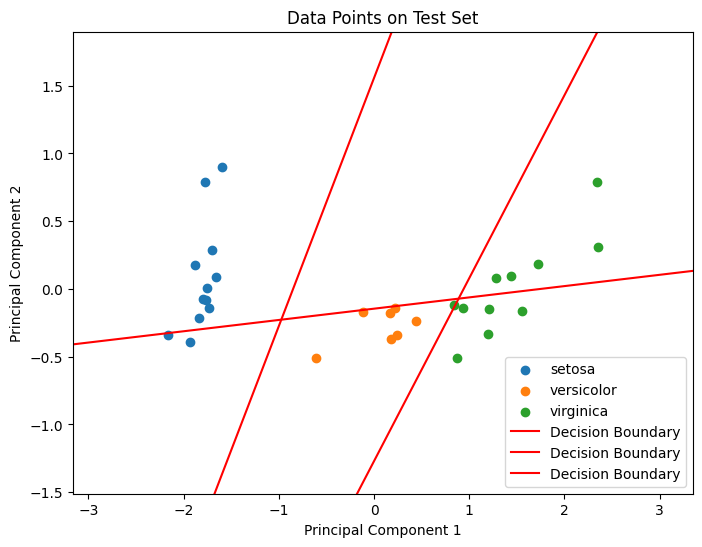

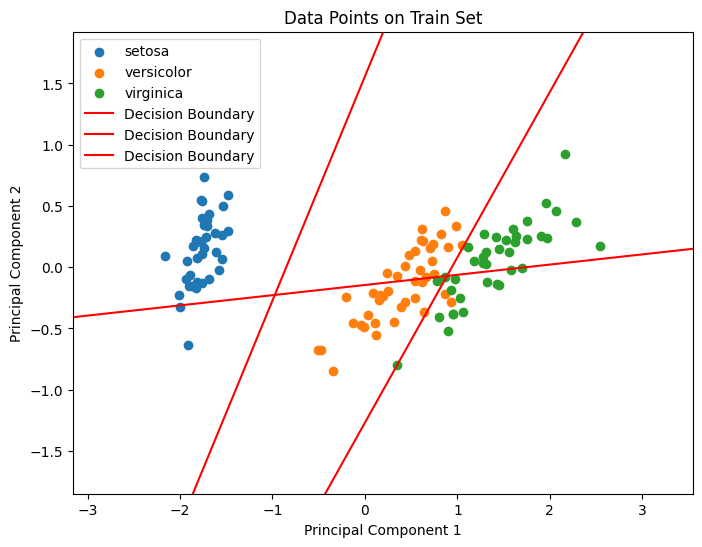

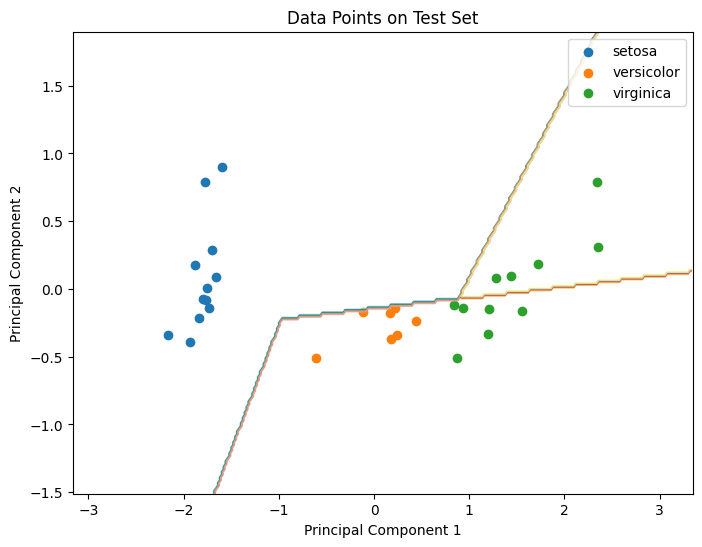

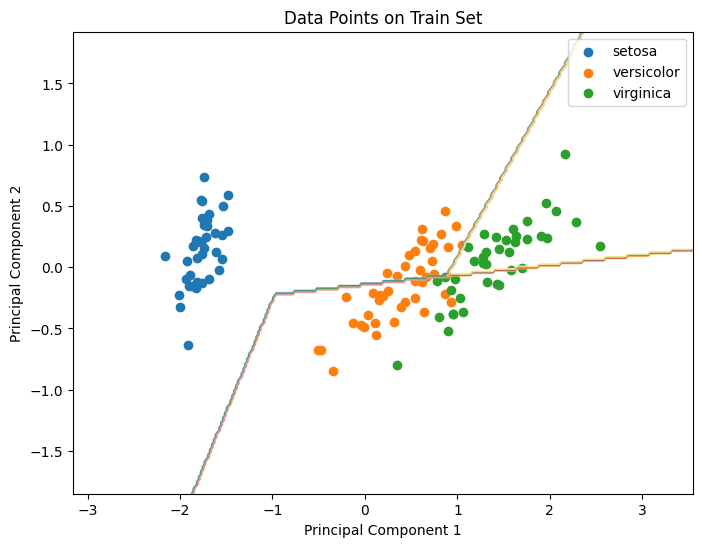

['setosa' 'versicolor' 'virginica']
Class 0 - Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Class 1 - Precision: 0.5385, Recall: 1.0000, F1-score: 0.7000
Class 2 - Precision: 1.0000, Recall: 0.4545, F1-score: 0.6250
Accuracy: 0.8000


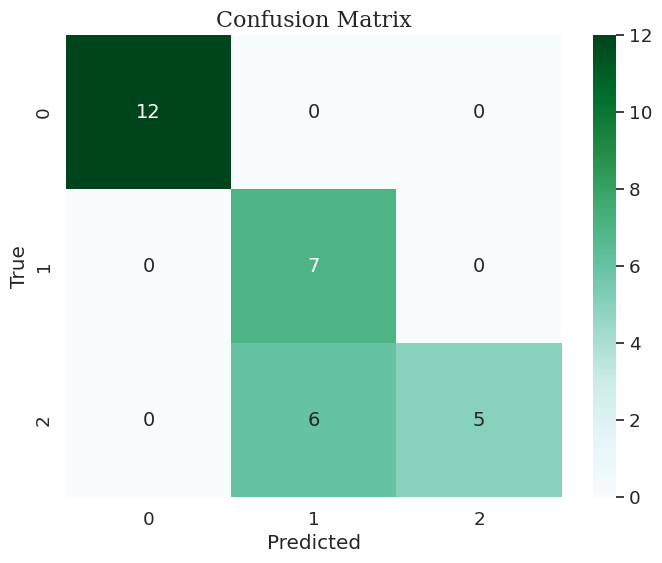

In [30]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

def visualize_multiclass_classification(X_train, y_train1, kernel_type, trainset, classifiers, class_labels, w_stack, b_stack,kernel_and_params):
    plt.figure(figsize=(8, 6))
    (_,poly_params, RBF_params, sigmoid_params,C) = kernel_and_params
    # Plotting data points for each class
    for i, target_name in enumerate(class_labels):
        plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':

        h = .02  # step size in the mesh
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        k=np.arange(x_min, x_max, h)
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        x_test = np.c_[xx.ravel(), yy.ravel()]
        model=multiclass_svm(x_train,x_test, y_train, C,kernel_type, poly_params, RBF_params, sigmoid_params)
        pred,_,_,_,_=model

        Z = pred.reshape(xx.shape)
        plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    else:
        h = .02  # step size in the mesh
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        k=np.arange(x_min, x_max, h)
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        x_test = np.c_[xx.ravel(), yy.ravel()]
        model=multiclass_svm(x_train,x_test, y_train, C,kernel_type, poly_params, RBF_params, sigmoid_params)
        pred,_,_,_,_=model

        Z = pred.reshape(xx.shape)
        plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)


    if trainset:
        plt.title('Data Points on Train Set')
    else:
        plt.title('Data Points on Test Set')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)
    plt.show()

# Now call visualize_multiclass_classification with the appropriate arguments
iris = load_iris()
class_0 = 0
class_1 = 1
class_2 = 2



def visualize_multiclass_classification1(X_train, y_train1, kernel_type, trainset, classifiers, class_labels, w_stack, b_stack):
    plt.figure(figsize=(8, 6))
    # Plotting data points for each class
    for i, target_name in enumerate(class_labels):
        plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':
        for i in range(len(class_labels)):
            w=w_stack[i]
            bias=b_stack[i]
            x_points = np.linspace(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1, 200)
            y_points = -(w[0] / w[1]) * x_points - bias / w[1]
            plt.plot(x_points, y_points, c='r', label='Decision Boundary')

    if trainset:
        plt.title('Data Points on Train Set')
    else:
        plt.title('Data Points on Test Set')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)
    plt.show()

iris = load_iris()
class_0 = 0
class_1 = 1
class_2 = 2
if kernel_and_params[0] == 'linear':
    visualize_multiclass_classification1(X_test, y_test,kernel_and_params[0],False, classifiers,iris.target_names[class_0:class_2+2], w_catch, b_catch)
    visualize_multiclass_classification1(X_train, y_train,kernel_and_params[0],True,classifiers, iris.target_names[class_0:class_2+2], w_catch, b_catch)
visualize_multiclass_classification(X_test, y_test, kernel_and_params[0], False, classifiers, iris.target_names[class_0:class_2+2], w_catch, b_catch, kernel_and_params)
visualize_multiclass_classification(X_train, y_train, kernel_and_params[0], True, classifiers, iris.target_names[class_0:class_2+2], w_catch, b_catch, kernel_and_params)


print(iris.target_names[class_0:class_2+2])


from evaluate import calculate_metrics_and_plot
# Evaluate the model on the training set
if __name__ == "__main__":
    y_true = y_test
    y_pred = pred
    calculate_metrics_and_plot(y_true, y_pred, labels=[0, 1, 2])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=42)

#*****here is the callable function *****--------------------------------------------------------------

model=multiclass_svm(x_train,x_test, y_train, 10,'polynomial', poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)) #just change linear to polynomial to see what happens!! :)
pred, kernel_and_params,w_catch, b_catch, classifiers=model


#*****here is the callable function *****--------------------------------------------------------------

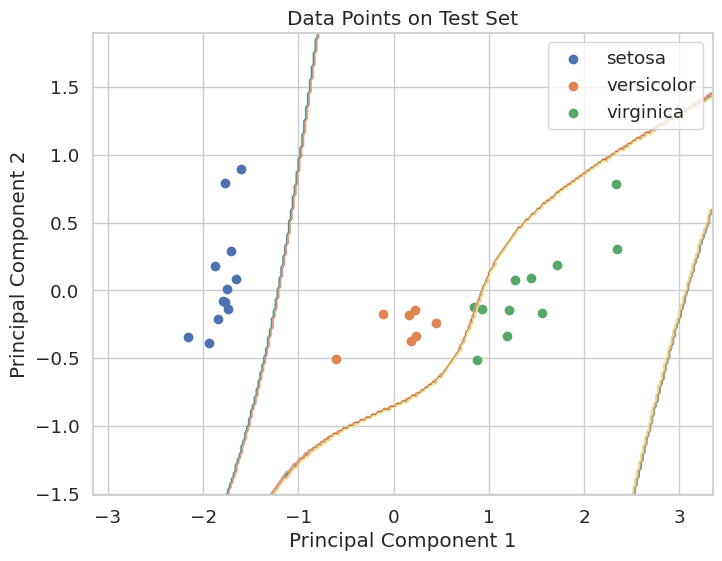

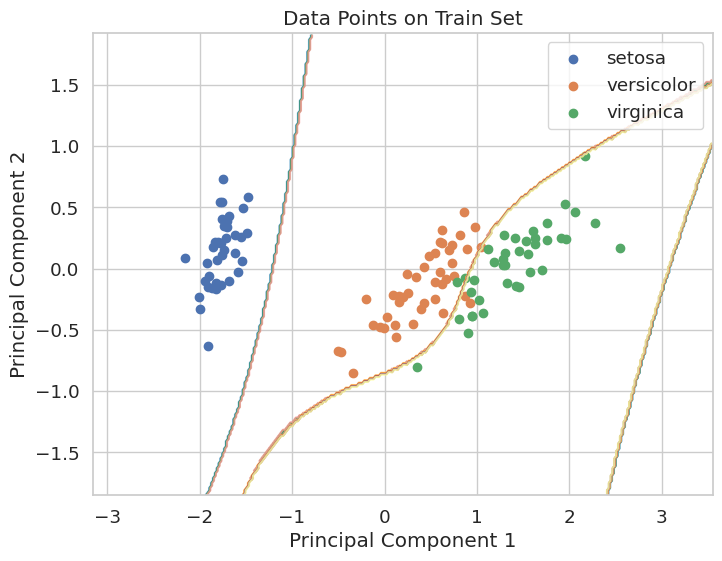

['setosa' 'versicolor' 'virginica']
Class 0 - Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Class 1 - Precision: 0.8750, Recall: 1.0000, F1-score: 0.9333
Class 2 - Precision: 1.0000, Recall: 0.9091, F1-score: 0.9524
Accuracy: 0.9667


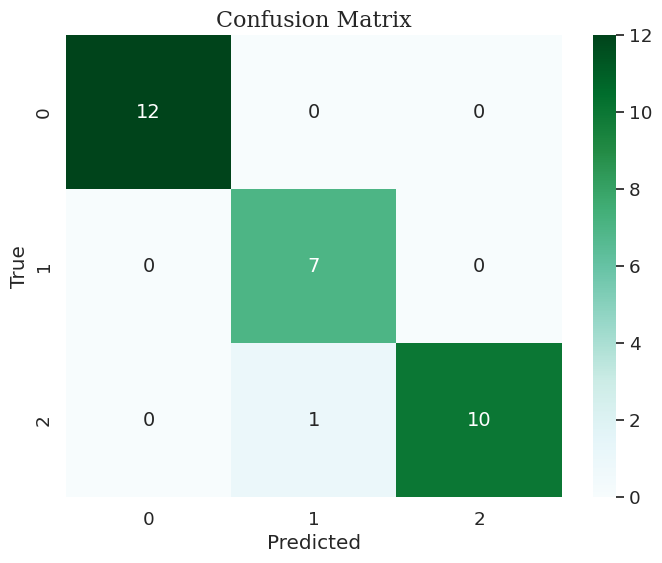

In [32]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

def visualize_multiclass_classification(X_train, y_train1, kernel_type, trainset, classifiers, class_labels, w_stack, b_stack,kernel_and_params):
    plt.figure(figsize=(8, 6))
    (_,poly_params, RBF_params, sigmoid_params,C) = kernel_and_params
    # Plotting data points for each class
    for i, target_name in enumerate(class_labels):
        plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':

        h = .02  # step size in the mesh
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        k=np.arange(x_min, x_max, h)
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        x_test = np.c_[xx.ravel(), yy.ravel()]
        model=multiclass_svm(x_train,x_test, y_train, C,kernel_type, poly_params, RBF_params, sigmoid_params)
        pred,_,_,_,_=model

        Z = pred.reshape(xx.shape)
        plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    else:
        h = .02  # step size in the mesh
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        k=np.arange(x_min, x_max, h)
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        x_test = np.c_[xx.ravel(), yy.ravel()]
        model=multiclass_svm(x_train,x_test, y_train, C,kernel_type, poly_params, RBF_params, sigmoid_params)
        pred,_,_,_,_=model

        Z = pred.reshape(xx.shape)
        plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)


    if trainset:
        plt.title('Data Points on Train Set')
    else:
        plt.title('Data Points on Test Set')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)
    plt.show()

# Now call visualize_multiclass_classification with the appropriate arguments
iris = load_iris()
class_0 = 0
class_1 = 1
class_2 = 2



def visualize_multiclass_classification1(X_train, y_train1, kernel_type, trainset, classifiers, class_labels, w_stack, b_stack):
    plt.figure(figsize=(8, 6))
    # Plotting data points for each class
    for i, target_name in enumerate(class_labels):
        plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':
        for i in range(len(class_labels)):
            w=w_stack[i]
            bias=b_stack[i]
            x_points = np.linspace(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1, 200)
            y_points = -(w[0] / w[1]) * x_points - bias / w[1]
            plt.plot(x_points, y_points, c='r', label='Decision Boundary')

    if trainset:
        plt.title('Data Points on Train Set')
    else:
        plt.title('Data Points on Test Set')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)
    plt.show()

iris = load_iris()
class_0 = 0
class_1 = 1
class_2 = 2
if kernel_and_params[0] == 'linear':
    visualize_multiclass_classification1(X_test, y_test,kernel_and_params[0],False, classifiers,iris.target_names[class_0:class_2+2], w_catch, b_catch)
    visualize_multiclass_classification1(X_train, y_train,kernel_and_params[0],True,classifiers, iris.target_names[class_0:class_2+2], w_catch, b_catch)
visualize_multiclass_classification(X_test, y_test, kernel_and_params[0], False, classifiers, iris.target_names[class_0:class_2+2], w_catch, b_catch, kernel_and_params)
visualize_multiclass_classification(X_train, y_train, kernel_and_params[0], True, classifiers, iris.target_names[class_0:class_2+2], w_catch, b_catch, kernel_and_params)


print(iris.target_names[class_0:class_2+2])


from evaluate import calculate_metrics_and_plot
# Evaluate the model on the training set
if __name__ == "__main__":
    y_true = y_test
    y_pred = pred
    calculate_metrics_and_plot(y_true, y_pred, labels=[0, 1, 2])